In [1]:
import numpy as np
import pandas as pd
import math
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_distance(data1, data2):
    points = zip(data1, data2)
    diffs_squared_distance = [pow(a - b, 2) for (a, b) in points]
    return math.sqrt(sum(diffs_squared_distance))

In [3]:
UNCLASSIFIED = False
NOISE = None

In [4]:
def _eps_neighborhood(p,q,eps):
	return get_distance(p,q) < eps

def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(0, n_points):
        if _eps_neighborhood(m[:,point_id], m[:,i], eps):
            seeds.append(i)
    return seeds

def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id
            
        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == UNCLASSIFIED or \
                       classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

In [5]:
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(0, n_points):
        point = m[:,point_id]
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

In [6]:
data = np.genfromtxt('dataset1.txt', delimiter=' ', usecols = range(0,2))
X = np.array(data)

In [7]:
X1 = []
X2 = []
for i in range(0,len(X)):
    X1.append(X[i][0])
    X2.append(X[i][1])
mk = np.matrix([X1,X2])

In [8]:
def test_dbscan():
    eps = 0.08
    min_points = 2
    return dbscan(mk, eps, min_points)

In [9]:
ans = test_dbscan()

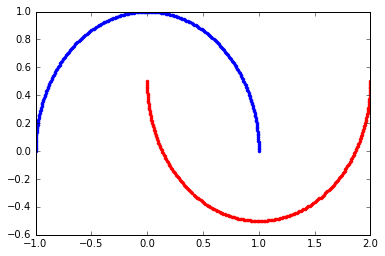

In [10]:
colors = ["g.","r.","b."]
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[ans[i]])
plt.show()

In [11]:
data2 = np.genfromtxt('dataset2.txt', delimiter=' ', usecols = range(0,2))
Y = np.array(data2)

In [12]:
Y1 = []
Y2 = []
for i in range(0,len(Y)):
    Y1.append(Y[i][0])
    Y2.append(Y[i][1])
mk1 = np.matrix([Y1,Y2])

In [13]:
def test_dbscan1():
    eps = 1.8
    min_points = 2
    return dbscan(mk1, eps, min_points)

In [14]:
ans1 = test_dbscan1()

In [15]:
print (ans1)


[1, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 1, 3, 3, 1, 2, 3, 2, 3, 1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 2, 3, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 2, 3, 2, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1, 3, 2, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 2, 3, 1, 2, 3, 3, 2, 1, 3, 3, 1, 3, 3, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 3, 2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 2, 3, 1, 

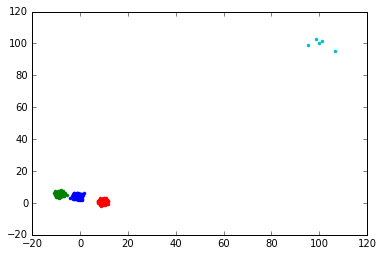

In [16]:
colors1 = ["c.","r.","b.","g."]
for j in range(0,len(Y)):
    if ans1[j] == 1:
         plt.plot(Y[j][0],Y[j][1],colors1[1])
    elif ans1[j] == 2:
        plt.plot(Y[j][0],Y[j][1],colors1[2])
    elif ans1[j] == 3:
        plt.plot(Y[j][0],Y[j][1],colors1[3])
    else:
        plt.plot(Y[j][0],Y[j][1],colors1[0])
plt.show()